# Loan Performance Model

## 1. Data Preparation

### 1.1. Import Data

I import application data and loan performance data and join them using the customer ID and the the first 10 digits of Loan ID, which leads to a dataset with 647 rows and 34 columns.

In [1]:
import pandas as pd
pd.options.display.max_columns = None

In [2]:
application_data = pd.read_csv('/application_data.csv')
loan_performance = pd.read_csv('/loan_performance.csv')

In [3]:
application_data.head(10)

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,address_zip,email,bank_routing_number,email_duration,residence_duration,bank_account_duration,payment_frequency,home_phone_type,other_phone_type,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money
0,9ece67d6c5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,6,138.48,500,3,NaN,84118,WanitaGVinyard@gmail.com,124001545,1 year or more,6 months or less,6 months or less,Semi-monthly,Mobile,NaN,Other,1560,614,574,600,656,561
1,5c2c402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,13,77.39,500,6,NaN,84062,NatashaTTucker@yahoo.com,124000054,1 year or more,3+ years,3+ years,Bi-weekly,Mobile,NaN,Other,900,708,501,550,651,563
2,e6254cad30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,13,61.91,400,6,NaN,84119,AnneDCisneros@hotmail.com,124001545,1 year or more,7-12 months,1-2 years,Bi-weekly,Mobile,NaN,Other,1434,687,522,561,661,598
3,49fb42f51d,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,8,108.48,500,4,NaN,84405,CatalinaRRoderick@hotmail.com,124002971,1 year or more,3+ years,7-12 months,Bi-weekly,Mobile,NaN,Other,1600,616,560,552,634,591
4,195fbe5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,8,65.09,300,4,NaN,84404,PhillipMSinn@aol.com,124002971,1 year or more,3+ years,6 months or less,Bi-weekly,Mobile,Home,Other,1360,681,603,654,659,636
5,b5286ff5b4,400,5/23/77,Approved,False,1600,True,10/21/10 21:21,4,True,4,107.61,400,4,NaN,84020,BeckyRFleischer@aol.com,324079500,1 year or more,1-2 years,1-2 years,Monthly,Mobile,NaN,Other,4900,716,573,571,680,620
6,d06841c8cf,300,1/6/60,Approved,True,865,True,10/23/10 19:52,4,True,4,136.60,300,4,NaN,84404,DorisTGowen@hotmail.com,324377516,1 year or more,3+ years,1-2 years,Monthly,Mobile,NaN,Other,3200,486,580,627,659,627
7,90e4cdc381,500,10/17/59,Approved,True,1000,True,10/24/10 16:05,2,True,4,129.35,500,2,NaN,84020,CarolynCSmith@aol.com,124000054,1 year or more,6 months or less,6 months or less,Bi-weekly,Mobile,NaN,Other,2200,530,537,508,551,583
8,c1a1065b7a,400,4/20/61,Approved,True,169,True,10/26/10 11:22,4,True,4,182.14,400,4,164.04,84116,MarieCMurr@aol.com,324079555,1 year or more,3+ years,1-2 years,Monthly,Home,Mobile,Other,1200,645,532,560,680,594
9,0dba6b011d,500,12/27/82,Approved,True,1265,True,10/27/10 14:12,6,True,13,77.39,500,6,NaN,84095,DorothyJBoerger@yahoo.com,124001545,1 year or more,6 months or less,1-2 years,Bi-weekly,Mobile,NaN,Other,4160,586,527,525,637,592


In [4]:
loan_performance.head(10)

,idLoan,flgGood
0,0DBA6B011D-01,Bad
1,96ACBBA7ED-01,Bad
2,289421D82A-01,Bad
3,9ECE67D6C5-01,Good
4,5C2C402094-01,Bad
5,E6254CAD30-01,Good
6,AE03151FEE-01,Good
7,E55A9A7293-01,Bad
8,CFE9E0DC5E-01,Good
9,3744B9845D-01,Good


In [5]:
application_data.shape

(647, 31)

In [6]:
loan_performance.shape

(1285, 2)

In [7]:
loan_performance[loan_performance['idLoan']=='A91C516D95-01']

,idLoan,flgGood
40,A91C516D95-01,Bad


In [8]:
application_data['customer_id']=[i.upper() for i in application_data['customer_id']]
application_data.set_index('customer_id')
application_data.head(10)

,customer_id,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,address_zip,email,bank_routing_number,email_duration,residence_duration,bank_account_duration,payment_frequency,home_phone_type,other_phone_type,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money
0,9ECE67D6C5,500,8/21/91,Approved,True,0,True,10/16/10 14:06,3,True,6,138.48,500,3,NaN,84118,WanitaGVinyard@gmail.com,124001545,1 year or more,6 months or less,6 months or less,Semi-monthly,Mobile,NaN,Other,1560,614,574,600,656,561
1,5C2C402094,500,7/24/90,Approved,True,0,False,10/17/10 13:01,6,True,13,77.39,500,6,NaN,84062,NatashaTTucker@yahoo.com,124000054,1 year or more,3+ years,3+ years,Bi-weekly,Mobile,NaN,Other,900,708,501,550,651,563
2,E6254CAD30,400,9/13/80,Approved,True,620,True,10/17/10 19:52,6,True,13,61.91,400,6,NaN,84119,AnneDCisneros@hotmail.com,124001545,1 year or more,7-12 months,1-2 years,Bi-weekly,Mobile,NaN,Other,1434,687,522,561,661,598
3,49FB42F51D,500,9/10/76,Approved,False,785,False,10/18/10 7:05,4,True,8,108.48,500,4,NaN,84405,CatalinaRRoderick@hotmail.com,124002971,1 year or more,3+ years,7-12 months,Bi-weekly,Mobile,NaN,Other,1600,616,560,552,634,591
4,195FBE5739,300,12/1/79,Approved,True,700,True,10/19/10 10:58,4,True,8,65.09,300,4,NaN,84404,PhillipMSinn@aol.com,124002971,1 year or more,3+ years,6 months or less,Bi-weekly,Mobile,Home,Other,1360,681,603,654,659,636
5,B5286FF5B4,400,5/23/77,Approved,False,1600,True,10/21/10 21:21,4,True,4,107.61,400,4,NaN,84020,BeckyRFleischer@aol.com,324079500,1 year or more,1-2 years,1-2 years,Monthly,Mobile,NaN,Other,4900,716,573,571,680,620
6,D06841C8CF,300,1/6/60,Approved,True,865,True,10/23/10 19:52,4,True,4,136.60,300,4,NaN,84404,DorisTGowen@hotmail.com,324377516,1 year or more,3+ years,1-2 years,Monthly,Mobile,NaN,Other,3200,486,580,627,659,627
7,90E4CDC381,500,10/17/59,Approved,True,1000,True,10/24/10 16:05,2,True,4,129.35,500,2,NaN,84020,CarolynCSmith@aol.com,124000054,1 year or more,6 months or less,6 months or less,Bi-weekly,Mobile,NaN,Other,2200,530,537,508,551,583
8,C1A1065B7A,400,4/20/61,Approved,True,169,True,10/26/10 11:22,4,True,4,182.14,400,4,164.04,84116,MarieCMurr@aol.com,324079555,1 year or more,3+ years,1-2 years,Monthly,Home,Mobile,Other,1200,645,532,560,680,594
9,0DBA6B011D,500,12/27/82,Approved,True,1265,True,10/27/10 14:12,6,True,13,77.39,500,6,NaN,84095,DorothyJBoerger@yahoo.com,124001545,1 year or more,6 months or less,1-2 years,Bi-weekly,Mobile,NaN,Other,4160,586,527,525,637,592


In [9]:
loan_performance['customer_id']=[i[0:10] for i in loan_performance['idLoan']]
loan_performance.set_index('customer_id')
loan_performance.head(10)

,idLoan,flgGood,customer_id
0,0DBA6B011D-01,Bad,0DBA6B011D
1,96ACBBA7ED-01,Bad,96ACBBA7ED
2,289421D82A-01,Bad,289421D82A
3,9ECE67D6C5-01,Good,9ECE67D6C5
4,5C2C402094-01,Bad,5C2C402094
5,E6254CAD30-01,Good,E6254CAD30
6,AE03151FEE-01,Good,AE03151FEE
7,E55A9A7293-01,Bad,E55A9A7293
8,CFE9E0DC5E-01,Good,CFE9E0DC5E
9,3744B9845D-01,Good,3744B9845D


In [10]:
dataset = application_data.join(loan_performance, lsuffix='_customer', rsuffix='_loan')

In [11]:
dataset.sort_values(by='customer_id_customer')

,customer_id_customer,amount_requested,birth_date,status,residence_rent_or_own,monthly_rent_amount,bank_account_direct_deposit,application_when,loan_duration,payment_ach,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,address_zip,email,bank_routing_number,email_duration,residence_duration,bank_account_duration,payment_frequency,home_phone_type,other_phone_type,how_use_money,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,idLoan,flgGood,customer_id_loan
525,00B5DC96D2,800,5/22/72,Approved,True,568,True,3/28/11 19:37,8,True,12,84.03,500,6,84.03,84081,CarlSSimas@bing.com,124302150,1 year or more,3+ years,1-2 years,Semi-monthly,Work,NaN,Other,3800,521,531,596,641,603,22B6199FC1-01,Bad,22B6199FC1
381,00B8ADFE83,800,4/12/76,Approved,True,250,False,2/25/11 18:00,6,True,6,171.75,500,6,171.75,84010,DorothyBArnett@yahoo.com,124001545,4-12 months,3+ years,1-2 years,Monthly,Mobile,Home,Bills (Medical),3500,645,575,633,671,618,7374DFC557-01,Bad,7374DFC557
79,021B03F1B5,500,8/12/73,Approved,True,1250,True,12/8/10 18:56,5,True,21,44.01,500,5,39.37,84606,JoanDBaze@hotmail.com,324079500,1 year or more,1-2 years,1-2 years,Weekly,Home,Mobile,Other,6000,663,618,682,703,630,43F95271B3-01,Good,43F95271B3
252,02309382CF,300,8/25/57,Approved,False,0,False,1/28/11 10:09,5,True,5,116.34,300,5,116.34,84403,KeturahJWood@gmail.com,324377613,1 year or more,3+ years,3+ years,Monthly,Home,NaN,Bills,753,536,590,634,668,621,E6B0D099C0-01,Good,E6B0D099C0
562,031247AB75,500,5/6/65,Approved,True,350,False,4/2/11 17:34,4,True,8,110.97,500,4,110.97,84528,TheresaRMouser@bing.com,324377134,1 year or more,1-2 years,3+ years,Semi-monthly,Home,Work,Bills (General),1000,297,543,573,680,610,3FE561DC66-01,Good,3FE561DC66
47,03BFF4B96F,500,11/18/68,Approved,True,700,True,11/19/10 13:34,5,True,10,92.17,500,5,82.58,84721,MatthewAChristian@hotmail.com,324079555,1 year or more,6 months or less,6 months or less,Bi-weekly,Mobile,NaN,Other,1600,544,574,584,671,612,AE74EBDB3A-01,Bad,AE74EBDB3A
148,042BF4BB0E,800,2/8/76,Approved,True,550,True,12/27/10 17:32,3,True,6,138.48,500,3,128.06,84094,DeniseMLyle@hotmail.com,124001545,1 year or more,3+ years,1-2 years,Semi-monthly,Mobile,Work,Other,5400,623,505,556,680,581,2210108642-01,Good,2210108642
222,044AAB634B,500,1/21/49,Approved,True,605,False,1/22/11 9:00,5,True,10,92.17,500,5,92.17,84103,ThomasMWashington@hotmail.com,123271978,1 year or more,3+ years,3+ years,Bi-weekly,Mobile,Work,Other,1378,645,568,633,682,625,08A3E0CA08-01,Bad,08A3E0CA08
405,0496FAADCC,500,12/9/46,Approved,False,1120,True,3/4/11 13:22,6,True,6,171.75,500,6,171.75,83706,NancyBWeldon@aol.com,324172562,1 year or more,3+ years,3+ years,Monthly,Mobile,NaN,Bills (General),3500,763,627,650,667,643,A03771AC8F-01,Bad,A03771AC8F
225,0532E99235,800,4/2/69,Approved,True,750,True,1/22/11 21:47,8,True,6,171.75,500,6,171.75,83642,MichelleSPartin@aol.com,324173383,1 year or more,1-2 years,3+ years,Monthly,Home,Mobile,Other,3212,716,501,521,668,561,1891881AEB-01,Good,1891881AEB


In [12]:
dataset.shape

(647, 34)

### 1.2. Create Numerical Variables from Date Variables

We have two date variables in the dataset; birth_date and application_when. We use these two date variables to calculate the age at the time of application.

In [13]:
dataset['birth_day'] = [int(i.split('/')[1]) for i in dataset['birth_date']]
dataset['birth_month'] = [int(i.split('/')[0]) for i in dataset['birth_date']]
dataset['birth_year'] = [1900+int(i.split('/')[2]) for i in dataset['birth_date']]
dataset['application_day'] = [int(i.split('/')[1]) for i in dataset['application_when']]
dataset['application_month'] = [int(i.split('/')[0]) for i in dataset['application_when']]
dataset['application_year'] = [2000 + int(i.split('/')[2].split(' ')[0]) for i in dataset['application_when']]
dataset['age_at_application'] = dataset['application_year'] - dataset['birth_year'] + [(i-j)/12 for i,j in zip(dataset['application_month'],dataset['birth_month'])]
dataset[['birth_day', 'birth_month', 'birth_year', 'application_day', 'application_month', 'application_year', 'age_at_application']].head(10)

,birth_day,birth_month,birth_year,application_day,application_month,application_year,age_at_application
0,21,8,1991,16,10,2010,19.166667
1,24,7,1990,17,10,2010,20.250000
2,13,9,1980,17,10,2010,30.083333
3,10,9,1976,18,10,2010,34.083333
4,1,12,1979,19,10,2010,30.833333
5,23,5,1977,21,10,2010,33.416667
6,6,1,1960,23,10,2010,50.750000
7,17,10,1959,24,10,2010,51.000000
8,20,4,1961,26,10,2010,49.500000
9,27,12,1982,27,10,2010,27.833333


### 1.3. Create Binary Target Variable

In [14]:
dataset['flgGood_new']=[1 if i=='Good' else 0 for i in dataset['flgGood']]
print(dataset['flgGood_new'].value_counts())
print(dataset['flgGood'].value_counts())

0    355
1    292
Name: flgGood_new, dtype: int64
Bad     355
Good    292
Name: flgGood, dtype: int64


### 1.4. Assess Data Quality and Missing Values

In [15]:
dataset.isnull().sum()

customer_id_customer             0
amount_requested                 0
birth_date                       0
status                           0
residence_rent_or_own            0
monthly_rent_amount              0
bank_account_direct_deposit      0
application_when                 0
loan_duration                    0
payment_ach                      0
num_payments                     0
payment_amount                   0
amount_approved                  0
duration_approved                0
payment_amount_approved         20
address_zip                      0
email                            0
bank_routing_number              0
email_duration                   0
residence_duration               0
bank_account_duration            1
payment_frequency                0
home_phone_type                  0
other_phone_type               285
how_use_money                    2
monthly_income_amount            0
raw_l2c_score                    0
raw_FICO_telecom                 0
raw_FICO_retail     

There are __four__ variables with missing values:

1. Other Phone Type: Missing values of other_phone_type are the ones that did not have a second phone number on the file. So, we tag the missing values with 'not available' tag.

2. How Use Money: Impute the missing values.

3. Bank Account Duration: Impute the missing values.

4. Payment Amount Approved: It is highly correlated with payment_amount. We use payment amount instead.

#### 1. Other Phone Type

In [16]:
print('Percent of missing "Cabin" records is %.2f%%' %((dataset['other_phone_type'].isnull().sum()/dataset.shape[0])*100))

Percent of missing "Cabin" records is 44.05%


In [17]:
dataset['other_phone_type_new'] = dataset['other_phone_type'].fillna('not available')

#### 2. How Use Money

In [18]:
import seaborn as sns

Other                             328
Bills (General)                    89
Bills                              61
Bills (Auto)                       50
Bills (Medical)                    32
Car                                29
Bills (Home / Utilities)           17
Pay off loans / overdrawn acct     11
Medical                            10
Rent                                5
School                              5
Rent / Mortgage                     4
Gifts / Leisure                     3
Won't say                           1
Name: how_use_money, dtype: int64


[Text(0, 0, 'Other'),
 Text(0, 0, "Won't say"),
 Text(0, 0, 'Bills'),
 Text(0, 0, 'Car'),
 Text(0, 0, 'Medical'),
 Text(0, 0, 'Rent'),
 Text(0, 0, 'Bills (General)'),
 Text(0, 0, 'Bills (Auto)'),
 Text(0, 0, 'Bills (Medical)'),
 Text(0, 0, 'Gifts / Leisure'),
 Text(0, 0, 'Pay off loans / overdrawn acct'),
 Text(0, 0, 'Rent / Mortgage'),
 Text(0, 0, 'Bills (Home / Utilities)'),
 Text(0, 0, 'School')]

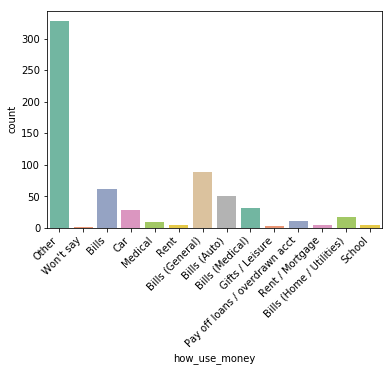

In [19]:
print(dataset['how_use_money'].value_counts())
chart = sns.countplot(x='how_use_money', data=dataset, palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()

In [20]:
dataset['how_use_money'] = dataset['how_use_money'].fillna('Other')

Other                             330
Bills (General)                    89
Bills                              61
Bills (Auto)                       50
Bills (Medical)                    32
Car                                29
Bills (Home / Utilities)           17
Pay off loans / overdrawn acct     11
Medical                            10
Rent                                5
School                              5
Rent / Mortgage                     4
Gifts / Leisure                     3
Won't say                           1
Name: how_use_money, dtype: int64


[Text(0, 0, 'Other'),
 Text(0, 0, "Won't say"),
 Text(0, 0, 'Bills'),
 Text(0, 0, 'Car'),
 Text(0, 0, 'Medical'),
 Text(0, 0, 'Rent'),
 Text(0, 0, 'Bills (General)'),
 Text(0, 0, 'Bills (Auto)'),
 Text(0, 0, 'Bills (Medical)'),
 Text(0, 0, 'Gifts / Leisure'),
 Text(0, 0, 'Pay off loans / overdrawn acct'),
 Text(0, 0, 'Rent / Mortgage'),
 Text(0, 0, 'Bills (Home / Utilities)'),
 Text(0, 0, 'School')]

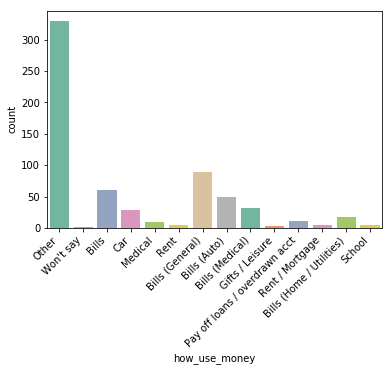

In [21]:
print(dataset['how_use_money'].value_counts())
chart = sns.countplot(x='how_use_money', data=dataset, palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()

#### 3. Bank Account Duration

3+ years            327
1-2 years           133
6 months or less    131
7-12 months          55
Name: bank_account_duration, dtype: int64


[Text(0, 0, '6 months or less'),
 Text(0, 0, '3+ years'),
 Text(0, 0, '1-2 years'),
 Text(0, 0, '7-12 months')]

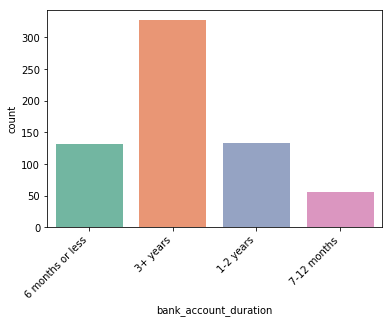

In [22]:
print(dataset['bank_account_duration'].value_counts())
chart = sns.countplot(x='bank_account_duration', data=dataset, palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()

In [23]:
dataset['bank_account_duration'] = dataset['bank_account_duration'].fillna('3+ years')

3+ years            328
1-2 years           133
6 months or less    131
7-12 months          55
Name: bank_account_duration, dtype: int64


[Text(0, 0, '6 months or less'),
 Text(0, 0, '3+ years'),
 Text(0, 0, '1-2 years'),
 Text(0, 0, '7-12 months')]

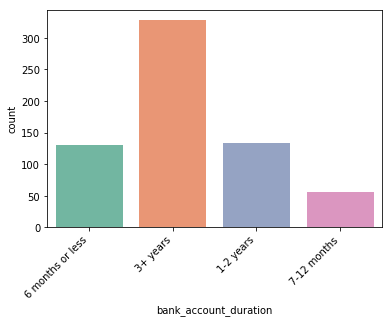

In [24]:
print(dataset['bank_account_duration'].value_counts())
chart = sns.countplot(x='bank_account_duration', data=dataset, palette='Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.show()

The email type does not have any use. Just creating for fun!

In [25]:
dataset['email_type'] = [i.split('@')[1].split('.')[0] for i in dataset['email']]
dataset['email_type'].head(15)

0       gmail
1       yahoo
2     hotmail
3     hotmail
4         aol
5         aol
6     hotmail
7         aol
8         aol
9       yahoo
10      yahoo
11      gmail
12    hotmail
13    hotmail
14    hotmail
Name: email_type, dtype: object

## 1.5 Create Model Dataset

### a- Contibuous Variables

In [26]:
dataset.columns

Index(['customer_id_customer', 'amount_requested', 'birth_date', 'status',
       'residence_rent_or_own', 'monthly_rent_amount',
       'bank_account_direct_deposit', 'application_when', 'loan_duration',
       'payment_ach', 'num_payments', 'payment_amount', 'amount_approved',
       'duration_approved', 'payment_amount_approved', 'address_zip', 'email',
       'bank_routing_number', 'email_duration', 'residence_duration',
       'bank_account_duration', 'payment_frequency', 'home_phone_type',
       'other_phone_type', 'how_use_money', 'monthly_income_amount',
       'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail',
       'raw_FICO_bank_card', 'raw_FICO_money', 'idLoan', 'flgGood',
       'customer_id_loan', 'birth_day', 'birth_month', 'birth_year',
       'application_day', 'application_month', 'application_year',
       'age_at_application', 'flgGood_new', 'other_phone_type_new',
       'email_type'],
      dtype='object')

We select the variables that attribute to loan outcome and are meaningful. We drop variables like email, address_zip and bank routing number which does not attribute to loan outcome. We select 15 continuous variables and the target variable.

In [27]:
dataset_model = dataset[['age_at_application', 'amount_requested', 'monthly_rent_amount', 'loan_duration', #1-4 continuous
                         'num_payments', 'payment_amount', 'amount_approved', 'duration_approved', #5-8 continuous
                         'payment_amount_approved', 'monthly_income_amount', #9,10 continuous
                        'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money', #11-15 Credit Scores Continuous
                        'flgGood_new' #Target
                        ]]

### b- Add Dummy Variables

In [28]:
dummies_1 = pd.get_dummies(dataset['email_duration'], prefix='email_duration')
dummies_1.columns

Index(['email_duration_1 year or more', 'email_duration_3 months or less',
       'email_duration_4-12 months'],
      dtype='object')

In [29]:
dummies_2 = pd.get_dummies(dataset['residence_duration'], prefix='residence_duration')
dummies_2.columns

Index(['residence_duration_1-2 years', 'residence_duration_3+ years',
       'residence_duration_6 months or less',
       'residence_duration_7-12 months'],
      dtype='object')

In [30]:
dummies_3 = pd.get_dummies(dataset['bank_account_duration'], prefix='bank_account_duration')
dummies_3.columns

Index(['bank_account_duration_1-2 years', 'bank_account_duration_3+ years',
       'bank_account_duration_6 months or less',
       'bank_account_duration_7-12 months'],
      dtype='object')

In [31]:
dummies_4 = pd.get_dummies(dataset['payment_frequency'], prefix='payment_frequency')
dummies_4.columns

Index(['payment_frequency_Bi-weekly', 'payment_frequency_Monthly',
       'payment_frequency_Semi-monthly', 'payment_frequency_Weekly'],
      dtype='object')

In [32]:
dummies_5 = pd.get_dummies(dataset['home_phone_type'], prefix='home_phone_type')
dummies_5.columns

Index(['home_phone_type_Home', 'home_phone_type_Mobile',
       'home_phone_type_Work'],
      dtype='object')

In [33]:
dummies_6 = pd.get_dummies(dataset['other_phone_type_new'], prefix='other_phone_type_new')
dummies_6.columns

Index(['other_phone_type_new_Home', 'other_phone_type_new_Mobile',
       'other_phone_type_new_Work', 'other_phone_type_new_not available'],
      dtype='object')

In [34]:
dummies_7 = pd.get_dummies(dataset['how_use_money'], prefix='how_use_money')
dummies_7.columns

Index(['how_use_money_Bills', 'how_use_money_Bills (Auto)',
       'how_use_money_Bills (General)',
       'how_use_money_Bills (Home / Utilities)',
       'how_use_money_Bills (Medical)', 'how_use_money_Car',
       'how_use_money_Gifts / Leisure', 'how_use_money_Medical',
       'how_use_money_Other', 'how_use_money_Pay off loans / overdrawn acct',
       'how_use_money_Rent', 'how_use_money_Rent / Mortgage',
       'how_use_money_School', 'how_use_money_Won't say'],
      dtype='object')

In [35]:
dataset['residence_rent'] = [1 if i==True else 0 for i in dataset['residence_rent_or_own']]
dataset['bank_account_direct_deposit_binary'] = [1 if i==True else 0 for i in dataset['bank_account_direct_deposit']]

In [36]:
dataset_model = dataset_model.join(dummies_1)
dataset_model = dataset_model.join(dummies_2)
dataset_model = dataset_model.join(dummies_3)
dataset_model = dataset_model.join(dummies_4)
dataset_model = dataset_model.join(dummies_5)
dataset_model = dataset_model.join(dummies_6)
dataset_model = dataset_model.join(dummies_7)
dataset_model = dataset_model.join(dataset['residence_rent'])
dataset_model = dataset_model.join(dataset['bank_account_direct_deposit_binary'])

In [37]:
display(dataset_model)

,age_at_application,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,payment_amount_approved,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,flgGood_new,email_duration_1 year or more,email_duration_3 months or less,email_duration_4-12 months,residence_duration_1-2 years,residence_duration_3+ years,residence_duration_6 months or less,residence_duration_7-12 months,bank_account_duration_1-2 years,bank_account_duration_3+ years,bank_account_duration_6 months or less,bank_account_duration_7-12 months,payment_frequency_Bi-weekly,payment_frequency_Monthly,payment_frequency_Semi-monthly,payment_frequency_Weekly,home_phone_type_Home,home_phone_type_Mobile,home_phone_type_Work,other_phone_type_new_Home,other_phone_type_new_Mobile,other_phone_type_new_Work,other_phone_type_new_not available,how_use_money_Bills,how_use_money_Bills (Auto),how_use_money_Bills (General),how_use_money_Bills (Home / Utilities),how_use_money_Bills (Medical),how_use_money_Car,how_use_money_Gifts / Leisure,how_use_money_Medical,how_use_money_Other,how_use_money_Pay off loans / overdrawn acct,how_use_money_Rent,how_use_money_Rent / Mortgage,how_use_money_School,how_use_money_Won't say,residence_rent,bank_account_direct_deposit_binary
0,19.166667,500,0,3,6,138.48,500,3,NaN,1560,614,574,600,656,561,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,20.250000,500,0,6,13,77.39,500,6,NaN,900,708,501,550,651,563,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,30.083333,400,620,6,13,61.91,400,6,NaN,1434,687,522,561,661,598,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,34.083333,500,785,4,8,108.48,500,4,NaN,1600,616,560,552,634,591,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,30.833333,300,700,4,8,65.09,300,4,NaN,1360,681,603,654,659,636,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
5,33.416667,400,1600,4,4,107.61,400,4,NaN,4900,716,573,571,680,620,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
6,50.750000,300,865,4,4,136.60,300,4,NaN,3200,486,580,627,659,627,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
7,51.000000,500,1000,2,4,129.35,500,2,NaN,2200,530,537,508,551,583,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
8,49.500000,400,169,4,4,182.14,400,4,164.04,1200,645,532,560,680,594,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
9,27.833333,500,1265,6,13,77.39,500,6,NaN,4160,586,527,525,637,592,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


In [38]:
dataset_model = dataset_model.drop(columns=['payment_amount_approved',
                           #'bank_account_direct_deposit'
                           ])

# 2. Exploratory Data Analysis

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

In [40]:
dataset_model.describe()

,age_at_application,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,flgGood_new,email_duration_1 year or more,email_duration_3 months or less,email_duration_4-12 months,residence_duration_1-2 years,residence_duration_3+ years,residence_duration_6 months or less,residence_duration_7-12 months,bank_account_duration_1-2 years,bank_account_duration_3+ years,bank_account_duration_6 months or less,bank_account_duration_7-12 months,payment_frequency_Bi-weekly,payment_frequency_Monthly,payment_frequency_Semi-monthly,payment_frequency_Weekly,home_phone_type_Home,home_phone_type_Mobile,home_phone_type_Work,other_phone_type_new_Home,other_phone_type_new_Mobile,other_phone_type_new_Work,other_phone_type_new_not available,how_use_money_Bills,how_use_money_Bills (Auto),how_use_money_Bills (General),how_use_money_Bills (Home / Utilities),how_use_money_Bills (Medical),how_use_money_Car,how_use_money_Gifts / Leisure,how_use_money_Medical,how_use_money_Other,how_use_money_Pay off loans / overdrawn acct,how_use_money_Rent,how_use_money_Rent / Mortgage,how_use_money_School,how_use_money_Won't say,residence_rent,bank_account_direct_deposit_binary
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,42.672849,597.604328,585.265842,5.925811,10.264297,116.575178,525.347759,5.540958,2617.151468,594.102009,568.927357,596.774343,665.174652,603.151468,0.451314,0.921175,0.023184,0.055641,0.188563,0.588872,0.109737,0.112828,0.205564,0.506955,0.202473,0.085008,0.508501,0.270479,0.179289,0.041731,0.174652,0.809892,0.015456,0.098918,0.125193,0.335394,0.440495,0.094281,0.077280,0.137558,0.026275,0.049459,0.044822,0.004637,0.015456,0.510046,0.017002,0.007728,0.006182,0.007728,0.001546,0.664606,0.816074
std,12.382089,168.855126,438.081725,1.571042,4.218088,56.565140,132.429646,1.224533,1706.526011,123.077446,42.796545,52.084877,39.851141,27.776116,0.498009,0.269674,0.150604,0.229405,0.391463,0.492419,0.312804,0.316628,0.404426,0.500338,0.402154,0.279109,0.500315,0.444551,0.383891,0.200129,0.379963,0.392690,0.123453,0.298783,0.331194,0.472493,0.496831,0.292446,0.267241,0.344702,0.160076,0.216992,0.207074,0.067988,0.123453,0.500286,0.129377,0.087636,0.078445,0.087636,0.039314,0.472493,0.387723
min,18.083333,250.000000,0.000000,2.000000,3.000000,35.210000,250.000000,2.000000,300.000000,50.000000,222.000000,222.000000,222.000000,222.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.791667,500.000000,270.000000,5.000000,6.000000,77.390000,500.000000,5.000000,1502.000000,539.500000,537.500000,556.000000,646.500000,588.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,41.750000,500.000000,550.000000,5.000000,10.000000,92.170000,500.000000,5.000000,2289.000000

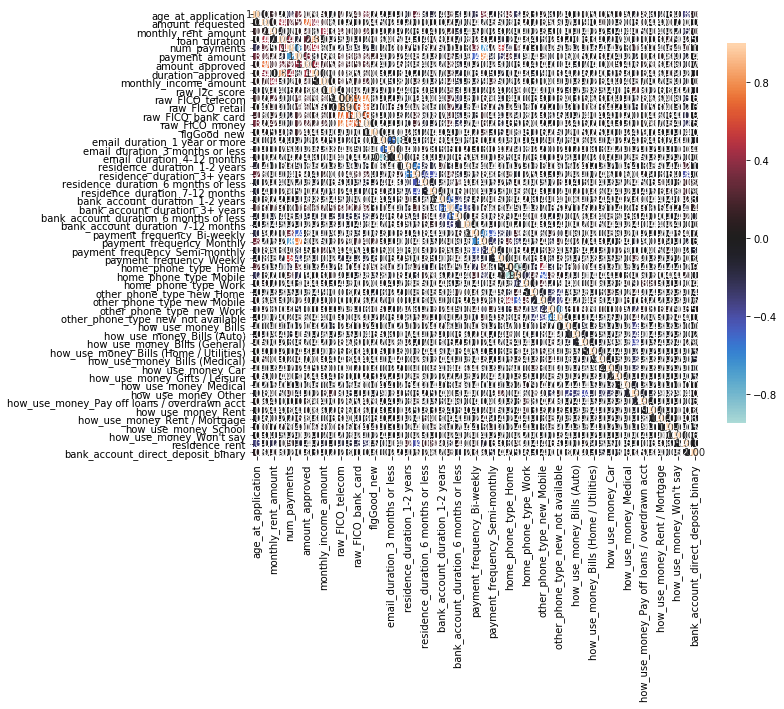

In [41]:
correlation_heatmap(dataset_model)

In [42]:
dataset_model.groupby('flgGood_new').mean()

,age_at_application,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,email_duration_1 year or more,email_duration_3 months or less,email_duration_4-12 months,residence_duration_1-2 years,residence_duration_3+ years,residence_duration_6 months or less,residence_duration_7-12 months,bank_account_duration_1-2 years,bank_account_duration_3+ years,bank_account_duration_6 months or less,bank_account_duration_7-12 months,payment_frequency_Bi-weekly,payment_frequency_Monthly,payment_frequency_Semi-monthly,payment_frequency_Weekly,home_phone_type_Home,home_phone_type_Mobile,home_phone_type_Work,other_phone_type_new_Home,other_phone_type_new_Mobile,other_phone_type_new_Work,other_phone_type_new_not available,how_use_money_Bills,how_use_money_Bills (Auto),how_use_money_Bills (General),how_use_money_Bills (Home / Utilities),how_use_money_Bills (Medical),how_use_money_Car,how_use_money_Gifts / Leisure,how_use_money_Medical,how_use_money_Other,how_use_money_Pay off loans / overdrawn acct,how_use_money_Rent,how_use_money_Rent / Mortgage,how_use_money_School,how_use_money_Won't say,residence_rent,bank_account_direct_deposit_binary
flgGood_new,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,42.454930,590.281690,588.476056,5.833803,10.732394,109.467718,520.704225,5.504225,2620.039437,601.470423,569.250704,596.774648,665.554930,602.715493,0.918310,0.022535,0.059155,0.169014,0.600000,0.121127,0.109859,0.191549,0.512676,0.216901,0.078873,0.523944,0.216901,0.197183,0.061972,0.146479,0.839437,0.014085,0.115493,0.118310,0.315493,0.450704,0.095775,0.064789,0.132394,0.019718,0.047887,0.042254,0.005634,0.011268,0.549296,0.008451,0.005634,0.005634,0.008451,0.002817,0.664789,0.814085
1,42.937785,606.506849,581.363014,6.037671,9.695205,125.216096,530.993151,5.585616,2613.640411,585.143836,568.534247,596.773973,664.712329,603.681507,0.924658,0.023973,0.051370,0.212329,0.575342,0.095890,0.116438,0.222603,0.500000,0.184932,0.092466,0.489726,0.335616,0.157534,0.017123,0.208904,0.773973,0.017123,0.078767,0.133562,0.359589,0.428082,0.092466,0.092466,0.143836,0.034247,0.051370,0.047945,0.003425,0.020548,0.462329,0.027397,0.010274,0.006849,0.006849,0.000000,0.664384,0.818493


In [43]:
rent = dataset_model[dataset['residence_rent_or_own']==True]
own = dataset_model[dataset['residence_rent_or_own']==False]

print('Rent average payment=', rent['monthly_rent_amount'].mean())
print('Rent zero payment ratio=', sum([1 for i in rent['monthly_rent_amount'] if i==0]) /len(rent))
print('Own averag payment= ', own['monthly_rent_amount'].mean())
print('Own non-zero payment ratio= ', sum([1 for i in own['monthly_rent_amount'] if i!=0]) /len(own))

Rent average payment= 520.9372093023255
Rent zero payment ratio= 0.12790697674418605
Own averag payment=  712.7373271889401
Own non-zero payment ratio=  0.7880184331797235


In [44]:
dataset_model.isna().sum()

age_at_application                              0
amount_requested                                0
monthly_rent_amount                             0
loan_duration                                   0
num_payments                                    0
payment_amount                                  0
amount_approved                                 0
duration_approved                               0
monthly_income_amount                           0
raw_l2c_score                                   0
raw_FICO_telecom                                0
raw_FICO_retail                                 0
raw_FICO_bank_card                              0
raw_FICO_money                                  0
flgGood_new                                     0
email_duration_1 year or more                   0
email_duration_3 months or less                 0
email_duration_4-12 months                      0
residence_duration_1-2 years                    0
residence_duration_3+ years                     0


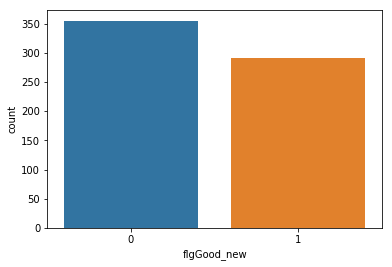

In [45]:
import seaborn as sns
sns.countplot(x = 'flgGood_new', data = dataset_model)
plt.show()

The classes are balanced. There is no need for oversampling.

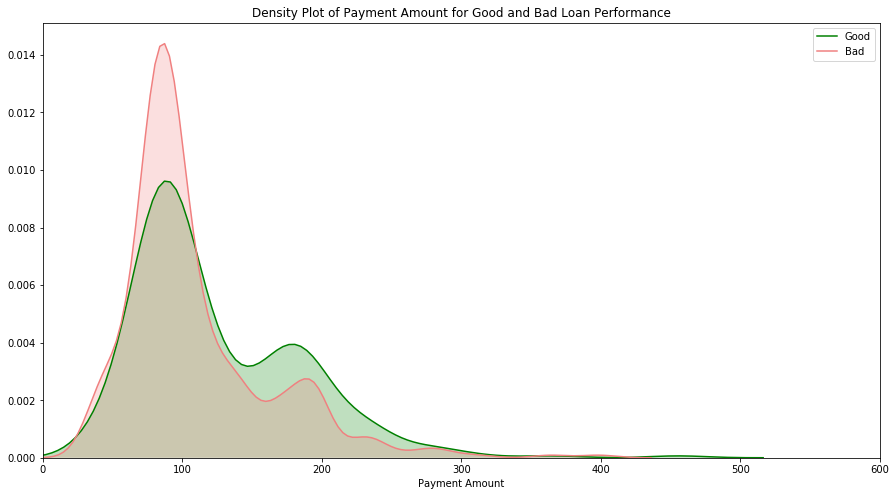

In [46]:
''' 'amount_requested', 'monthly_rent_amount', 'loan_duration',
                         'num_payments', 'payment_amount', 'amount_approved', 'duration_approved',
                         'payment_amount_approved', 'monthly_income_amount',
                        'raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money'''
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_model["payment_amount"][dataset_model['flgGood_new'] == 1], color="green", shade=True)
sns.kdeplot(dataset_model["payment_amount"][dataset_model['flgGood_new'] == 0], color="lightcoral", shade=True)
plt.legend(['Good', 'Bad'])
plt.title('Density Plot of Payment Amount for Good and Bad Loan Performance')
ax.set(xlabel='Payment Amount')
plt.xlim(0,600)
plt.show()

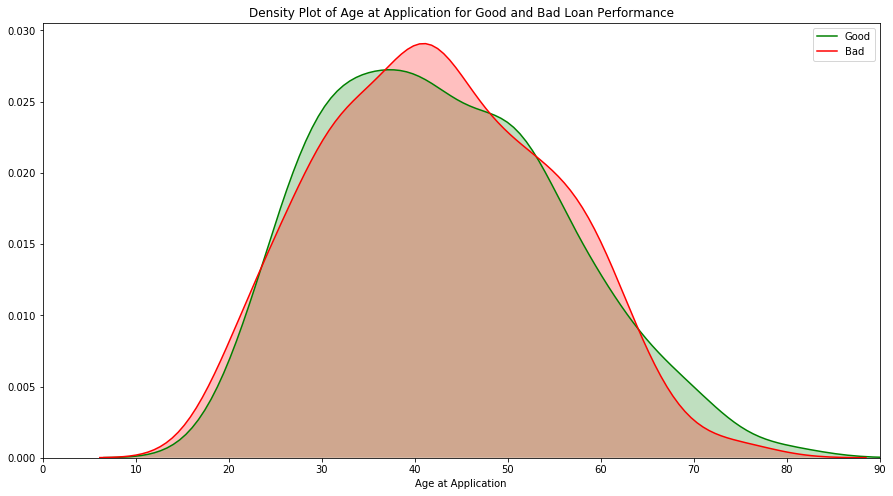

In [47]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_model["age_at_application"][dataset_model['flgGood_new'] == 1], color="green", shade=True)
sns.kdeplot(dataset_model["age_at_application"][dataset_model['flgGood_new'] == 0], color="red", shade=True)
plt.legend(['Good', 'Bad'])
plt.title('Density Plot of Age at Application for Good and Bad Loan Performance')
ax.set(xlabel='Age at Application')
plt.xlim(0,90)
plt.show()

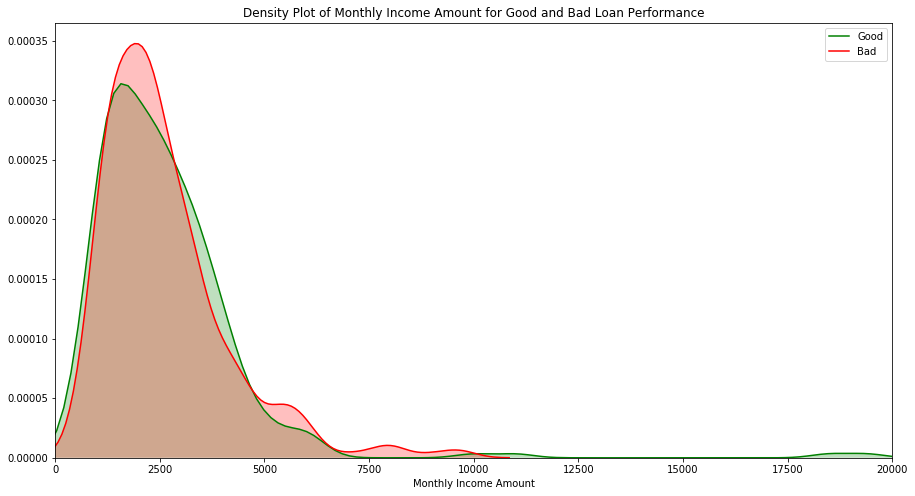

In [48]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_model["monthly_income_amount"][dataset_model['flgGood_new'] == 1], color="green", shade=True)
sns.kdeplot(dataset_model["monthly_income_amount"][dataset_model['flgGood_new'] == 0], color="red", shade=True)
plt.legend(['Good', 'Bad'])
plt.title('Density Plot of Monthly Income Amount for Good and Bad Loan Performance')
ax.set(xlabel='Monthly Income Amount')
plt.xlim(0,20000)
plt.show()

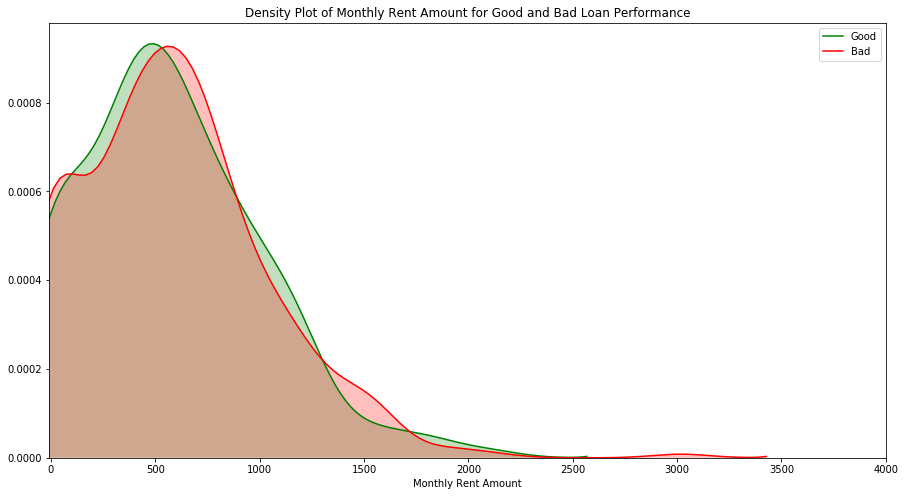

In [49]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_model["monthly_rent_amount"][dataset_model['flgGood_new'] == 1], color="green", shade=True)
sns.kdeplot(dataset_model["monthly_rent_amount"][dataset_model['flgGood_new'] == 0], color="red", shade=True)
plt.legend(['Good', 'Bad'])
plt.title('Density Plot of Monthly Rent Amount for Good and Bad Loan Performance')
ax.set(xlabel='Monthly Rent Amount')
plt.xlim(-10,4000)
plt.show()

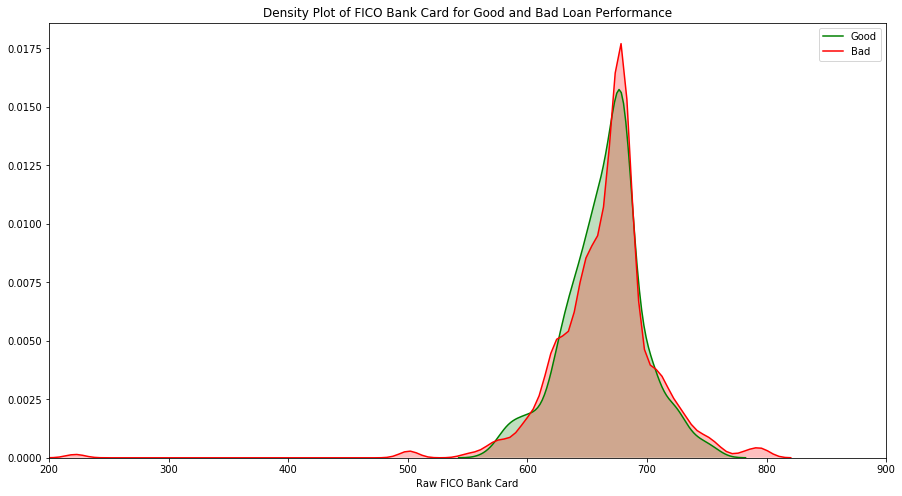

In [50]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(dataset_model["raw_FICO_bank_card"][dataset_model['flgGood_new'] == 1], color="green", shade=True)
sns.kdeplot(dataset_model["raw_FICO_bank_card"][dataset_model['flgGood_new'] == 0], color="red", shade=True)
plt.legend(['Good', 'Bad'])
plt.title('Density Plot of FICO Bank Card for Good and Bad Loan Performance')
ax.set(xlabel='Raw FICO Bank Card')
plt.xlim(200,900)
plt.show()

Text(0, 0.5, 'Frequency of Loan Performance')

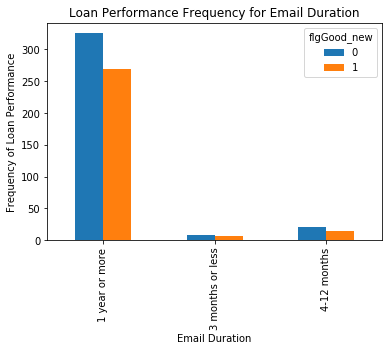

In [51]:
pd.crosstab(dataset['email_duration'], dataset['flgGood_new']).plot(kind='bar')
plt.title('Loan Performance Frequency for Email Duration')
plt.xlabel('Email Duration')
plt.ylabel('Frequency of Loan Performance')

Text(0, 0.5, 'Frequency of Loan Performance')

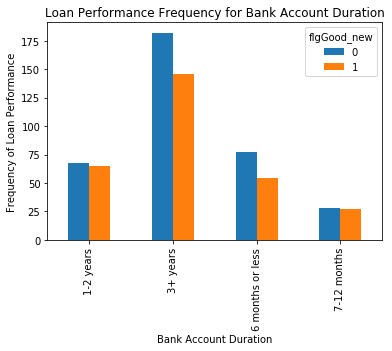

In [52]:
pd.crosstab(dataset['bank_account_duration'], dataset['flgGood_new']).plot(kind='bar')
plt.title('Loan Performance Frequency for Bank Account Duration')
plt.xlabel('Bank Account Duration')
plt.ylabel('Frequency of Loan Performance')

Text(0, 0.5, 'Frequency of Loan Performance')

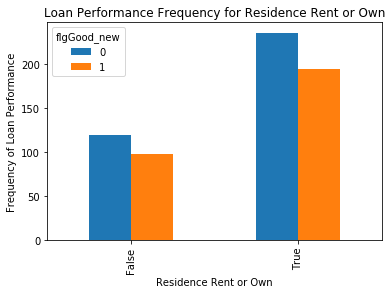

In [53]:
pd.crosstab(dataset['residence_rent_or_own'], dataset['flgGood_new']).plot(kind='bar')
plt.title('Loan Performance Frequency for Residence Rent or Own')
plt.xlabel('Residence Rent or Own')
plt.ylabel('Frequency of Loan Performance')

Text(0, 0.5, 'Frequency of Loan Performance')

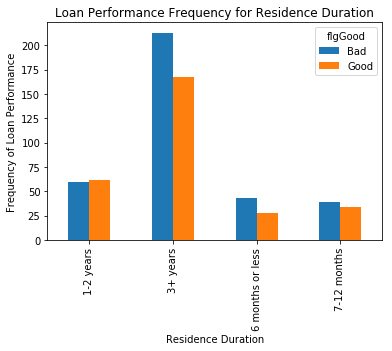

In [54]:
pd.crosstab(dataset['residence_duration'], dataset['flgGood']).plot(kind='bar')
plt.title('Loan Performance Frequency for Residence Duration')
plt.xlabel('Residence Duration')
plt.ylabel('Frequency of Loan Performance')

Text(0, 0.5, 'Frequency of Loan Performance')

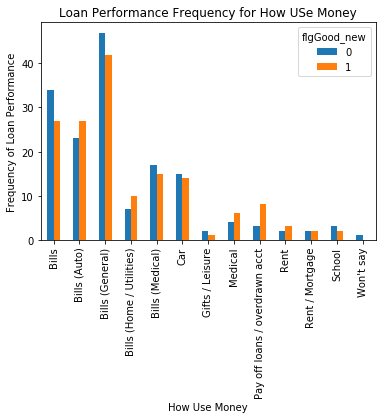

In [55]:
pd.crosstab(dataset['how_use_money'][dataset['how_use_money']!='Other'], dataset['flgGood_new']).plot(kind='bar')
plt.title('Loan Performance Frequency for How USe Money')
plt.xlabel('How Use Money')
plt.ylabel('Frequency of Loan Performance')

Text(0, 0.5, 'Frequency of Loan Performance')

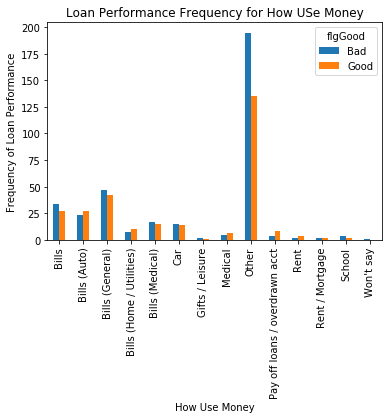

In [56]:
pd.crosstab(dataset['how_use_money'], dataset['flgGood']).plot(kind='bar')
plt.title('Loan Performance Frequency for How USe Money')
plt.xlabel('How Use Money')
plt.ylabel('Frequency of Loan Performance')

The following variables might be high importance features:
- How Use Money
- Residence Duration
- Bank Account Duration
- Monthyly Income
- Payment Amount

# 3. Descriptive Statistics

In [57]:
dataset_model.describe()

,age_at_application,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,monthly_income_amount,raw_l2c_score,raw_FICO_telecom,raw_FICO_retail,raw_FICO_bank_card,raw_FICO_money,flgGood_new,email_duration_1 year or more,email_duration_3 months or less,email_duration_4-12 months,residence_duration_1-2 years,residence_duration_3+ years,residence_duration_6 months or less,residence_duration_7-12 months,bank_account_duration_1-2 years,bank_account_duration_3+ years,bank_account_duration_6 months or less,bank_account_duration_7-12 months,payment_frequency_Bi-weekly,payment_frequency_Monthly,payment_frequency_Semi-monthly,payment_frequency_Weekly,home_phone_type_Home,home_phone_type_Mobile,home_phone_type_Work,other_phone_type_new_Home,other_phone_type_new_Mobile,other_phone_type_new_Work,other_phone_type_new_not available,how_use_money_Bills,how_use_money_Bills (Auto),how_use_money_Bills (General),how_use_money_Bills (Home / Utilities),how_use_money_Bills (Medical),how_use_money_Car,how_use_money_Gifts / Leisure,how_use_money_Medical,how_use_money_Other,how_use_money_Pay off loans / overdrawn acct,how_use_money_Rent,how_use_money_Rent / Mortgage,how_use_money_School,how_use_money_Won't say,residence_rent,bank_account_direct_deposit_binary
count,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,42.672849,597.604328,585.265842,5.925811,10.264297,116.575178,525.347759,5.540958,2617.151468,594.102009,568.927357,596.774343,665.174652,603.151468,0.451314,0.921175,0.023184,0.055641,0.188563,0.588872,0.109737,0.112828,0.205564,0.506955,0.202473,0.085008,0.508501,0.270479,0.179289,0.041731,0.174652,0.809892,0.015456,0.098918,0.125193,0.335394,0.440495,0.094281,0.077280,0.137558,0.026275,0.049459,0.044822,0.004637,0.015456,0.510046,0.017002,0.007728,0.006182,0.007728,0.001546,0.664606,0.816074
std,12.382089,168.855126,438.081725,1.571042,4.218088,56.565140,132.429646,1.224533,1706.526011,123.077446,42.796545,52.084877,39.851141,27.776116,0.498009,0.269674,0.150604,0.229405,0.391463,0.492419,0.312804,0.316628,0.404426,0.500338,0.402154,0.279109,0.500315,0.444551,0.383891,0.200129,0.379963,0.392690,0.123453,0.298783,0.331194,0.472493,0.496831,0.292446,0.267241,0.344702,0.160076,0.216992,0.207074,0.067988,0.123453,0.500286,0.129377,0.087636,0.078445,0.087636,0.039314,0.472493,0.387723
min,18.083333,250.000000,0.000000,2.000000,3.000000,35.210000,250.000000,2.000000,300.000000,50.000000,222.000000,222.000000,222.000000,222.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.791667,500.000000,270.000000,5.000000,6.000000,77.390000,500.000000,5.000000,1502.000000,539.500000,537.500000,556.000000,646.500000,588.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,41.750000,500.000000,550.000000,5.000000,10.000000,92.170000,500.000000,5.000000,2289.000000

# 4. Logistic Regression

## 4.1. Using L2C Score

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
X = X.drop(['raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [68]:
print('X Training ',X_train.shape,
      'y Training ',y_train.shape,
      'X Test ',X_test.shape,
      'y Test ',y_test.shape)

X Training  (420, 48) y Training  (420,) X Test  (227, 48) y Test  (227,)


In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 4, 10),
             'penalty': ['l1', 'l2']}
logistic = linear_model.LogisticRegression(solver='liblinear')

LReg1 = GridSearchCV(logistic, parameters, cv=5, verbose=0)
best_model = LReg1.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n", LReg1.best_params_)
#Prediction
prediction = LReg1.predict(X_test)
print("Training Set Accuracy:", LReg1.score(X_train,y_train))
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Best Hyper Parameters:
 {'C': 1.0, 'penalty': 'l1'}
Training Set Accuracy: 0.6214285714285714
Accuracy: 0.5110132158590308
Confusion Metrix:
 [[92 89]
 [22 24]]
F1-Score: 0.3018867924528302
Precision Score: 0.21238938053097345
Recall 0.5217391304347826


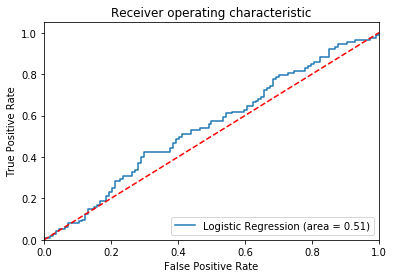

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LReg1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LReg1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Other Logistic Regression

In [ ]:
clf = LogisticRegression(random_state=0, penalty='l2').fit(X_train, y_train)

In [70]:
clf.score(X_train,y_train)

0.6285714285714286

In [71]:
clf.score(X_test,y_test)

0.5154185022026432

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89 25]
 [85 28]]


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.78      0.62       114
           1       0.53      0.25      0.34       113

   micro avg       0.52      0.52      0.52       227
   macro avg       0.52      0.51      0.48       227
weighted avg       0.52      0.52      0.48       227



In [82]:
for i,j in zip(X.columns, list(clf.coef_[0,:])):
    print(i, ' ', round(j,3))

age_at_application   0.005
amount_requested   -0.0
monthly_rent_amount   -0.0
loan_duration   0.313
num_payments   -0.078
payment_amount   0.0
amount_approved   0.001
duration_approved   -0.205
monthly_income_amount   -0.0
raw_l2c_score   -0.001
email_duration_1 year or more   -0.121
email_duration_3 months or less   0.027
email_duration_4-12 months   0.146
residence_duration_1-2 years   0.12
residence_duration_3+ years   -0.276
residence_duration_6 months or less   0.056
residence_duration_7-12 months   0.152
bank_account_duration_1-2 years   0.065
bank_account_duration_3+ years   -0.09
bank_account_duration_6 months or less   -0.252
bank_account_duration_7-12 months   0.33
payment_frequency_Bi-weekly   0.03
payment_frequency_Monthly   0.145
payment_frequency_Semi-monthly   -0.138
payment_frequency_Weekly   0.015
home_phone_type_Home   0.382
home_phone_type_Mobile   0.073
home_phone_type_Work   -0.403
other_phone_type_new_Home   -0.252
other_phone_type_new_Mobile   -0.172
other_phone_

We can test the logistic regression with (1) different values of penalty (l1, l2), (2) different values of training and test split.

## 4.2. Using Raw FICO Telecom

In [64]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
X = X.drop(['raw_l2c_score', 'raw_FICO_retail', 'raw_FICO_bank_card', 'raw_FICO_money'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [65]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 4, 10),
             'penalty': ['l1', 'l2']}
logistic = linear_model.LogisticRegression(solver='liblinear')

LReg2 = GridSearchCV(logistic, parameters, cv=5, verbose=0)
best_model = LReg2.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n", LReg2.best_params_)
#Prediction
prediction = LReg2.predict(X_test)
print("Training Set Accuracy:", LReg2.score(X_train,y_train))
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Best Hyper Parameters:
 {'C': 464.15888336127773, 'penalty': 'l2'}
Training Set Accuracy: 0.6404761904761904
Accuracy: 0.5198237885462555
Confusion Metrix:
 [[89 84]
 [25 29]]
F1-Score: 0.34730538922155685
Precision Score: 0.25663716814159293
Recall 0.5370370370370371


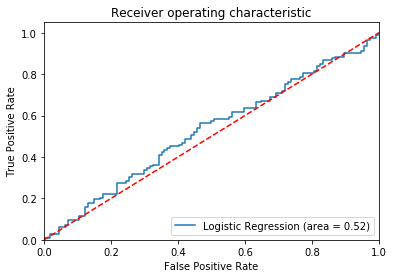

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LReg2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LReg2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [84]:
clf2 = LogisticRegression(random_state=0, penalty='l2').fit(X_train, y_train)

/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
clf2.score(X_train,y_train)

0.6190476190476191

In [86]:
clf2.score(X_test,y_test)

0.5154185022026432

In [87]:
y_pred = clf2.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89 25]
 [85 28]]


In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.78      0.62       114
           1       0.53      0.25      0.34       113

   micro avg       0.52      0.52      0.52       227
   macro avg       0.52      0.51      0.48       227
weighted avg       0.52      0.52      0.48       227



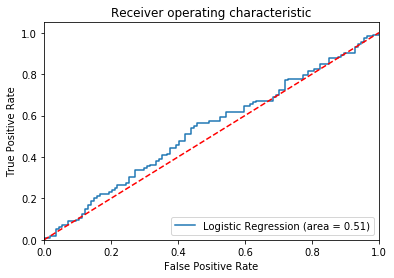

In [90]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 4.3. Using Raw FICO Retail

In [67]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_bank_card', 'raw_FICO_money'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [68]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 4, 10),
             'penalty': ['l1', 'l2']}
logistic = linear_model.LogisticRegression(solver='liblinear')

LReg3 = GridSearchCV(logistic, parameters, cv=5, verbose=0)
best_model = LReg3.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n", LReg3.best_params_)
#Prediction
prediction = LReg3.predict(X_test)
print("Training Set Accuracy:", LReg3.score(X_train,y_train))
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Best Hyper Parameters:
 {'C': 59.94842503189409, 'penalty': 'l2'}
Training Set Accuracy: 0.6238095238095238
Accuracy: 0.5198237885462555
Confusion Metrix:
 [[89 84]
 [25 29]]
F1-Score: 0.34730538922155685
Precision Score: 0.25663716814159293
Recall 0.5370370370370371


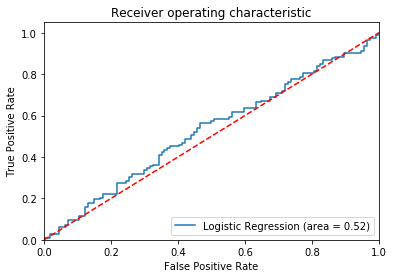

In [66]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LReg3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LReg3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [93]:
clf3 = LogisticRegression(random_state=0, penalty='l2').fit(X_train, y_train)

/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
clf3.score(X_train,y_train)

0.6333333333333333

In [95]:
clf3.score(X_test,y_test)

0.5198237885462555

In [96]:
y_pred = clf3.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[90 24]
 [85 28]]


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62       114
           1       0.54      0.25      0.34       113

   micro avg       0.52      0.52      0.52       227
   macro avg       0.53      0.52      0.48       227
weighted avg       0.53      0.52      0.48       227



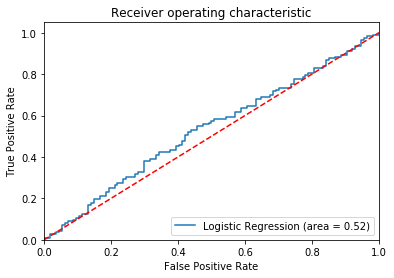

In [99]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 4.4. Using Raw FICO Money

<font color='red'>This is the selected logistic regression model.</font>


In [69]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [70]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 4, 10),
             'penalty': ['l1', 'l2']}
logistic = linear_model.LogisticRegression(solver='liblinear')

LReg4 = GridSearchCV(logistic, parameters, cv=5, verbose=0)
best_model = LReg4.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n", LReg4.best_params_)
#Prediction
prediction = LReg4.predict(X_test)
print("Training Set Accuracy:", LReg4.score(X_train,y_train))
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Best Hyper Parameters:
 {'C': 1.0, 'penalty': 'l1'}
Training Set Accuracy: 0.6023809523809524
Accuracy: 0.5286343612334802
Confusion Metrix:
 [[93 86]
 [21 27]]
F1-Score: 0.3354037267080745
Precision Score: 0.23893805309734514
Recall 0.5625


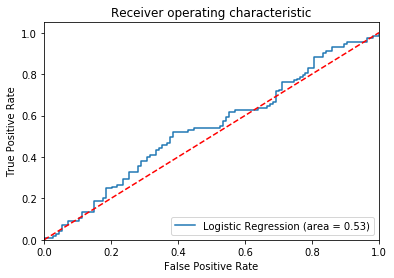

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LReg4.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LReg4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [101]:
clf4 = LogisticRegression(random_state=0, penalty='l2').fit(X_train, y_train)

/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [102]:
clf4.score(X_train,y_train)

0.6214285714285714

In [103]:
clf4.score(X_test,y_test)

0.5154185022026432

In [104]:
y_pred = clf4.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[89 25]
 [85 28]]


In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.78      0.62       114
           1       0.53      0.25      0.34       113

   micro avg       0.52      0.52      0.52       227
   macro avg       0.52      0.51      0.48       227
weighted avg       0.52      0.52      0.48       227



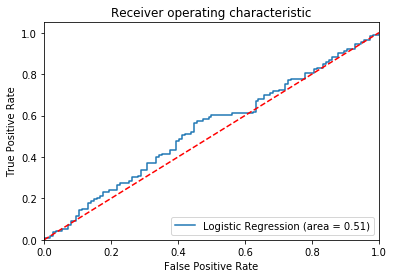

In [107]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf4.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf4.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 4.5. Using Raw FICO Bank Card

In [72]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_money'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [73]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(0, 4, 10),
             'penalty': ['l1', 'l2']}
logistic = linear_model.LogisticRegression(solver='liblinear')

LReg5 = GridSearchCV(logistic, parameters, cv=5, verbose=0)
best_model = LReg5.fit(X_train, y_train)

#The best hyper parameters set
print("Best Hyper Parameters:\n", LReg5.best_params_)
#Prediction
prediction = LReg5.predict(X_test)
print("Training Set Accuracy:", LReg5.score(X_train,y_train))
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Best Hyper Parameters:
 {'C': 1.0, 'penalty': 'l1'}
Training Set Accuracy: 0.6095238095238096
Accuracy: 0.5110132158590308
Confusion Metrix:
 [[92 89]
 [22 24]]
F1-Score: 0.3018867924528302
Precision Score: 0.21238938053097345
Recall 0.5217391304347826


/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


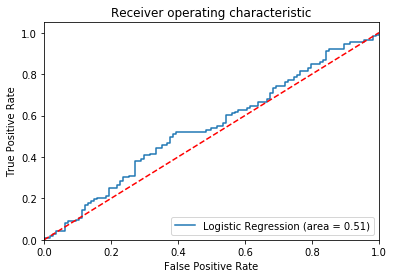

In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, LReg5.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LReg5.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [109]:
X.corr()

,age_at_application,amount_requested,monthly_rent_amount,loan_duration,num_payments,payment_amount,amount_approved,duration_approved,monthly_income_amount,raw_FICO_bank_card,email_duration_1 year or more,email_duration_3 months or less,email_duration_4-12 months,residence_duration_1-2 years,residence_duration_3+ years,residence_duration_6 months or less,residence_duration_7-12 months,bank_account_duration_1-2 years,bank_account_duration_3+ years,bank_account_duration_6 months or less,bank_account_duration_7-12 months,payment_frequency_Bi-weekly,payment_frequency_Monthly,payment_frequency_Semi-monthly,payment_frequency_Weekly,home_phone_type_Home,home_phone_type_Mobile,home_phone_type_Work,other_phone_type_new_Home,other_phone_type_new_Mobile,other_phone_type_new_Work,other_phone_type_new_not available,how_use_money_Bills,how_use_money_Bills (Auto),how_use_money_Bills (General),how_use_money_Bills (Home / Utilities),how_use_money_Bills (Medical),how_use_money_Car,how_use_money_Gifts / Leisure,how_use_money_Medical,how_use_money_Other,how_use_money_Pay off loans / overdrawn acct,how_use_money_Rent,how_use_money_Rent / Mortgage,how_use_money_School,how_use_money_Won't say,residence_rent,bank_account_direct_deposit_binary
age_at_application,1.000000,0.030425,0.118026,0.003631,-0.216013,0.300247,0.090587,0.046317,0.074265,0.177170,0.011002,-0.008101,-0.007615,-0.136928,0.275990,-0.118178,-0.143177,-0.025886,0.132235,-0.114704,-0.034269,-0.191937,0.320970,-0.081025,-0.077722,0.228883,-0.232455,0.034959,-0.023318,0.057691,-0.024543,-0.001093,0.009137,-0.014140,0.046496,0.013000,0.052267,0.012822,0.051759,0.016309,-0.077519,0.057993,-0.020848,-0.058608,0.001501,0.026480,-0.307807,0.079585
amount_requested,0.030425,1.000000,0.092225,0.466447,0.246592,0.224822,0.702247,0.397076,0.161272,-0.016179,-0.022851,0.011318,0.019431,-0.009548,-0.005348,0.006450,0.013750,0.016290,0.070282,-0.074912,-0.041656,0.019023,-0.051158,0.049621,-0.029103,-0.047755,0.024637,0.068613,-0.032115,0.049660,0.060533,-0.071358,-0.007958,-0.085082,-0.002308,0.008059,0.096185,-0.027915,0.000969,-0.050203,0.001660,0.037297,0.037866,0.001120,0.074479,0.000559,0.014167,0.008628
monthly_rent_amount,0.118026,0.092225,1.000000,-0.068387,-0.003410,0.090347,0.156443,-0.028868,0.425407,0.100686,0.024379,-0.073672,0.019707,-0.031236,0.010661,0.039912,-0.017392,0.020826,0.128434,-0.143352,-0.053864,-0.014793,-0.015766,0.028554,0.017230,-0.001209,0.006701,-0.017593,-0.029862,0.033591,-0.004231,-0.000411,0.007622,-0.043029,-0.022180,-0.019945,0.030036,-0.038748,-0.037618,-0.004713,0.049761,-0.013709,0.041275,-0.023246,0.021760,-0.052604,-0.206866,0.076396
loan_duration,0.003631,0.466447,-0.068387,1.000000,0.419464,-0.123219,0.293647,0.871413,-0.019856,-0.024370,0.004444,0.053078,-0.040070,0.030333,-0.037487,-0.065307,0.085316,0.006985,0.073522,-0.081543,-0.024428,0.034284,0.022127,-0.008712,-0.118148,-0.043091,0.029796,0.037847,-0.050298,-0.020798,0.027316,0.018134,-0.001599,-0.034255,0.027449,0.007763,0.024403,-0.070654,0.003226,0.005921,-0.008898,0.006215,0.026657,0.016288,0.094117,-0.023204,0.045672,-0.024977
num_payments,-0.216013,0.246592,-0.003410,0.419464,1.000000,-0.668340,0.254161,0.464378,-0.001920,-0.120811,-0.023843,0.004960,0.024772,0.045707,-0.081755,0.021394,0.049499,-0.013749,-0.005640,0.029546,-0.012539,0.319113,-0.667232,0.077760,0.535209,-0.185314,0.168694,0.033761,-0.013407,-0.020398,0.054872,-0.030525,-0.017722,-0.106035,-0.061241,-0.035519,-0.043055,-0.020673,0.028107,-0.007857,0.139216,0.008773,0.040530,-0.061085,0.040530,-0.002467,0.107459,-0.004305
payment_amount,0.300247,0.224822,0.090347,-0.123219,-0.668340,1.000000,0.383941,-0.059149,0.086382,0.184266,-0.017954,-0.023991,0.036856,-0.081047,0.093875,-0.032386,-0.013798,-0.056484,0.128935,-0.088885,-0.021217,-0.483857,0.793486,-0.153821,-0.257902,0.210570,-0.192628,-0.035362,-0.030374,0.095380,-0.109132,0.058471,0.001996,0.045583,0.021065,0.030079,0.074001,0.040415,-0.019758,-0.023848,-0.112004,0.03320

In [117]:
clf5 = LogisticRegression(random_state=0, penalty='l2').fit(X_train, y_train)

/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [118]:
clf5.score(X_train,y_train)

0.6261904761904762

In [119]:
clf5.score(X_test,y_test)

0.5330396475770925

In [120]:
y_pred = clf5.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[92 22]
 [84 29]]


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.81      0.63       114
           1       0.57      0.26      0.35       113

   micro avg       0.53      0.53      0.53       227
   macro avg       0.55      0.53      0.49       227
weighted avg       0.55      0.53      0.49       227



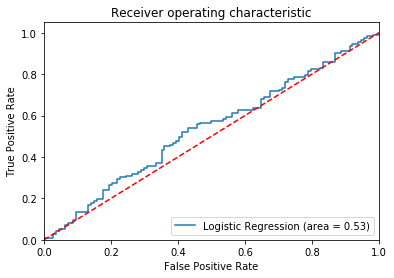

In [123]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf5.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf5.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 5. KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [102]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
#X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_money'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [103]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

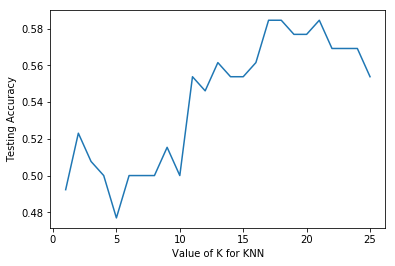

In [83]:
import matplotlib.pyplot as plt
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [84]:
print([str(k) + ': ' + str(round(s,3)) for k,s in zip(k_range,scores_list)])

['1: 0.492', '2: 0.523', '3: 0.508', '4: 0.5', '5: 0.477', '6: 0.5', '7: 0.5', '8: 0.5', '9: 0.515', '10: 0.5', '11: 0.554', '12: 0.546', '13: 0.562', '14: 0.554', '15: 0.554', '16: 0.562', '17: 0.585', '18: 0.585', '19: 0.577', '20: 0.577', '21: 0.585', '22: 0.569', '23: 0.569', '24: 0.569', '25: 0.554']


In [88]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors': [4,5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
KNN1 = GridSearchCV(model, cv=5 ,param_grid = params, n_jobs=1)
#Learning
KNN1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n", KNN1.best_params_)
#Prediction
prediction=KNN1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 6, 'weights': 'uniform'}
Accuracy: 0.5
Confusion Metrix:
 [[51 50]
 [15 14]]


/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


We choose the optimal value of k as 18. We train the KNN model with k=18. 

In [104]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

In [105]:
knn.score(X_train, y_train)

0.5996131528046421

In [106]:
knn.score(X_test, y_test)

0.5846153846153846

In [107]:
y_pred = knn.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[51 15]
 [39 25]]


In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65        66
           1       0.62      0.39      0.48        64

   micro avg       0.58      0.58      0.58       130
   macro avg       0.60      0.58      0.57       130
weighted avg       0.60      0.58      0.57       130



In [110]:
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Accuracy: 0.5846153846153846
Confusion Metrix:
 [[43 53]
 [23 11]]
F1-Score: 0.22448979591836735
Precision Score: 0.171875
Recall 0.3235294117647059


In [111]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.5816761363636364


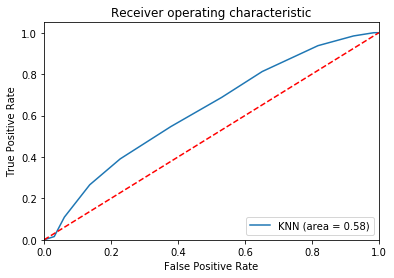

In [112]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 6. SVM

In [89]:
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np
from sklearn.model_selection import train_test_split

In [90]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
#X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
#Without Hyper Parameters Tuning
#making the instance
model = svm.SVC(random_state=123)
#learning
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Accuracy: 0.5
Confusion Metrix:
 [[65 65]
 [ 0  0]]


/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [91]:
#making the instance
model=svm.SVC()
#Hyper Parameters Set
SVM_params = {'C': [1,6,7,8,9,10,11,12], 
          'kernel': ['linear','rbf']}
#Making models with hyper parameters sets
SVM1 = GridSearchCV(model, cv=5, param_grid=SVM_params, n_jobs=-1)
#Learning
SVM1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",SVM1.best_params_)
#Prediction
prediction=SVM1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

KeyboardInterrupt: 

# 7. Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [79]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
#X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
print('X Training ',X_train.shape,
      'y Training ',y_train.shape,
      'X Test ',X_test.shape,
      'y Test ',y_test.shape)

X Training  (517, 52) y Training  (517,) X Test  (130, 52) y Test  (130,)


In [81]:
#Without Hyper Parameters Tuning
#1-1,DesicionTree
#importing module
from sklearn.tree import DecisionTreeClassifier
#making the instance
model= DecisionTreeClassifier(random_state=15)
#learning
model.fit(X_train, y_train)
#Prediction
prediction=model.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Accuracy: 0.5307692307692308
Confusion Metrix:
 [[40 36]
 [25 29]]
F1-Score: 0.48739495798319327
Precision Score: 0.4461538461538462
Recall 0.5370370370370371


In [86]:
model= DecisionTreeClassifier(random_state=12)
#Hyper Parameters Set
params = {'max_features': ['auto', 'sqrt', 'log2'],
          #'min_samples_split': [2,5,8,10],
          #[2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          #'min_samples_leaf': [1,2,3,4],
          #[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[68],
          'criterion':['gini','entropy'],
          'max_depth':list(range(4,31))+[40,50,70,90,120,150]}
#Making models with hyper parameters sets
DT1 = GridSearchCV(model, cv=5, param_grid=params, n_jobs=-1)
#Learning
DT1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:",DT1.best_params_)
#Prediction
prediction=DT1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Best Hyper Parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'random_state': 68}
Accuracy: 0.5384615384615384
Confusion Metrix:
 [[31 26]
 [34 39]]
F1-Score: 0.5652173913043479
Precision Score: 0.6
Recall 0.5342465753424658


/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [87]:
DT1 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
DT1 = DT1.fit(X_train, y_train)

In [88]:
DT1.score(X_train, y_train)

0.6131528046421664

In [89]:
DT1.score(X_test, y_test)

0.5846153846153846

In [90]:
y_pred = DT1.predict(X_test)
#DT1.predict_proba(X_test)

In [94]:
print('Accuracy= ', metrics.accuracy_score(y_test, y_pred))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Accuracy=  0.5846153846153846
F1-Score: 0.5652173913043479
Precision Score: 0.6
Recall 0.5342465753424658


In [92]:
for i,j in zip(X.columns, DT1.feature_importances_):
    print(i, ' ', round(j,4))

age_at_application   0.0
amount_requested   0.0
monthly_rent_amount   0.0
loan_duration   0.0
num_payments   0.0
payment_amount   0.3911
amount_approved   0.0
duration_approved   0.0
monthly_income_amount   0.2175
raw_l2c_score   0.0
raw_FICO_telecom   0.0
raw_FICO_retail   0.0
raw_FICO_bank_card   0.0
raw_FICO_money   0.2051
email_duration_1 year or more   0.0
email_duration_3 months or less   0.0
email_duration_4-12 months   0.0
residence_duration_1-2 years   0.0
residence_duration_3+ years   0.0
residence_duration_6 months or less   0.0
residence_duration_7-12 months   0.0
bank_account_duration_1-2 years   0.0
bank_account_duration_3+ years   0.0
bank_account_duration_6 months or less   0.0
bank_account_duration_7-12 months   0.0
payment_frequency_Bi-weekly   0.0
payment_frequency_Monthly   0.0
payment_frequency_Semi-monthly   0.0
payment_frequency_Weekly   0.0
home_phone_type_Home   0.0
home_phone_type_Mobile   0.0
home_phone_type_Work   0.0
other_phone_type_new_Home   0.0
other_ph

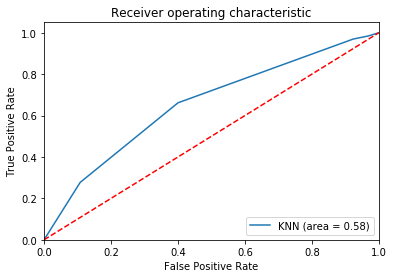

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

knn_roc_auc = roc_auc_score(y_test, DT1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DT1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 8. Random Forrest

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [75]:
X = dataset_model.loc[:, dataset_model.columns != 'flgGood_new']
#X = X.drop(['raw_l2c_score', 'raw_FICO_telecom', 'raw_FICO_retail', 'raw_FICO_bank_card'], axis=1)
y = dataset_model['flgGood_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
#without hyperparameter tuning
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
#Prediction
prediction=RF.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

Accuracy: 0.46923076923076923
Confusion Metrix:
 [[51 55]
 [14 10]]
F1-Score: 0.22471910112359555
Precision Score: 0.15384615384615385
Recall 0.4166666666666667


/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
#making the instance
model = RandomForestClassifier()
#hyper parameters set
RF_params = {'criterion':['gini','entropy'],
          'n_estimators': [10,15,20,25,30],
          'min_samples_leaf': [1,2,3],
          'min_samples_split': [3,4,5,6,7], 
          'random_state': [0],
          'n_jobs': [-1]}
#Making models with hyper parameters sets
RF1 = GridSearchCV(model, param_grid = RF_params, n_jobs=-1)
#learning
RF1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",RF1.best_params_)
#Prediction
prediction=RF1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction, y_test))
#F1-Score
print("F1-Score:", metrics.f1_score(prediction, y_test))
#Precision
print("Precision Score:", metrics.precision_score(prediction, y_test))
#Recall
print("Recall", metrics.recall_score(prediction, y_test))

/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Alireza_Maryam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 0}
Accuracy: 0.5461538461538461
Confusion Metrix:
 [[51 45]
 [14 20]]
F1-Score: 0.4040404040404041
Precision Score: 0.3076923076923077
Recall 0.5882352941176471


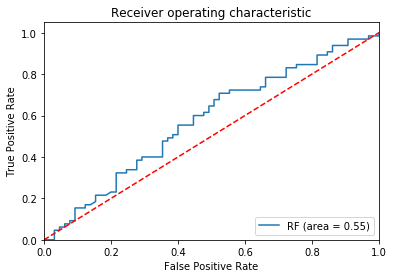

In [100]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rf_roc_auc = roc_auc_score(y_test, RF1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()